In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sns

In [4]:
sns.set_context('paper', font_scale=2.2)
sns.set_style('ticks')

In [5]:
import LB_colony_growth.LB_colony_growth as lb

import skimage as ski
import skimage.draw

In [6]:
dimension = 2

workgroup_x = 64
workgroup_y = 32

halo = 1 #ALWAYS 1 for this system.

num_alleles = 2

nx = 128
ny = 128

velocity_set = 'D2Q9'

In [7]:
ctx_info = {}
ctx_info['num_type'] = 'double'

ctx_info['nx'] = nx
ctx_info['ny'] = ny
ctx_info['nz'] = None

ctx_info['local_size'] = (workgroup_x, workgroup_y)
ctx_info['domain_size'] = (nx, ny)

ctx_info['dimension'] = dimension
ctx_info['num_alleles'] = num_alleles

ctx_info['kernel_arguments'] = {}

In [8]:
bc_map = np.zeros((nx + 2*halo, ny + 2*halo), dtype=lb.int_type)

bc_map[...] = lb.FLUID_NODE

bc_map[0:halo, :] = lb.WALL_NODE
bc_map[-halo:, :] = lb.WALL_NODE
bc_map[:, 0:halo] = lb.WALL_NODE
bc_map[:, -halo:] = lb.WALL_NODE

In [9]:
R0 = 10

[r, c] = ski.draw.circle(nx/2, ny/2, R0)

rand_alleles = np.random.randint(-num_alleles, 0, size=(nx, ny))

In [10]:
bc_map[r, c] = rand_alleles[r, c]

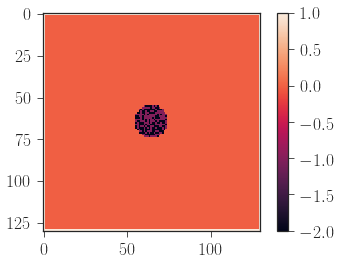

In [11]:
plt.imshow(bc_map)
plt.colorbar()

In [12]:
# Initialize rho...one everywhere, except in the circle where cells were inoculated

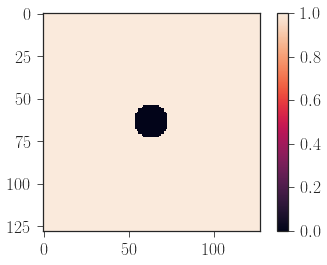

In [13]:
rho = np.ones((nx, ny), dtype=lb.num_type)
bc_in_domain = bc_map[halo:-halo, halo:-halo]

rho[bc_in_domain < 0] = 0

plt.imshow(rho)
plt.colorbar()

In [14]:
m0 = 1.0

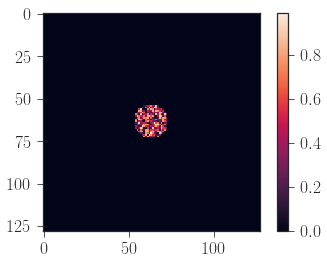

In [15]:
# Initialize the current amount of absorbed mass randomly

absorbed_mass = np.random.rand(nx, ny)
bc_in_domain = bc_map[halo:-halo, halo:-halo]

absorbed_mass[bc_in_domain >= 0] = 0

plt.imshow(absorbed_mass)
plt.colorbar()

In [16]:
k_list = [.1, .1]
m_reproduce_list = [m0, m0]
velocity_set = 'D2Q9'
D = .5 * (1./3.)

In [57]:
dla_colony = lb.DLA_Colony(
    ctx_info=ctx_info, velocity_set='D2Q9',
    bc_map=bc_map, 
    D=D, k_list=k_list, m_reproduce_list=m_reproduce_list,
    absorbed_mass=absorbed_mass, rho=rho)

global size: (128, 128)
local size: (64, 32)
The platforms detected are:
---------------------------
Intel(R) OpenCL Intel(R) Corporation version: OpenCL 1.2 LINUX
The devices detected on platform Intel(R) OpenCL are:
---------------------------
       Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz [Type: CPU ]
Maximum clock Frequency: 2000 MHz
Maximum allocable memory size: 2062 MB
Maximum work group size 8192
Maximum work item dimensions 3
Maximum work item size [8192L, 8192L, 8192L]
---------------------------
This context is associated with  1 devices


RuntimeError: clBuildProgram failed: BUILD_PROGRAM_FAILURE - 

Build on <pyopencl.Device 'Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz' on 'Intel(R) OpenCL' at 0x7fa46e520a18>:

Compilation started
1:195:29: error: use of undeclared identifier 'cur_x'; did you mean 'cur_cx'?
1:183:27: note: 'cur_cx' declared here
1:195:40: error: use of undeclared identifier 'cur_y'; did you mean 'cur_cy'?
1:184:27: note: 'cur_cy' declared here
Compilation failed

(options: -I /home/bryan/anaconda2/lib/python2.7/site-packages/pyopencl/cl)
(source saved as /tmp/tmpVSaFc2.cl)

In [58]:
# plt.imshow(dla_colony.f.get()[:, :, 1], interpolation='None')
# plt.colorbar()

In [19]:
# plt.imshow(dla_colony.rho.get(), interpolation=None)
# plt.colorbar()

In [20]:
# plt.imshow(dla_colony.feq.get()[:, :, 3])
# plt.colorbar()

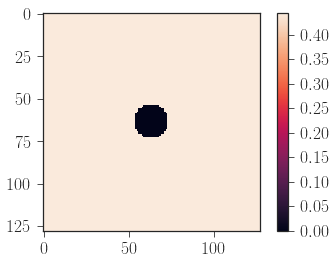

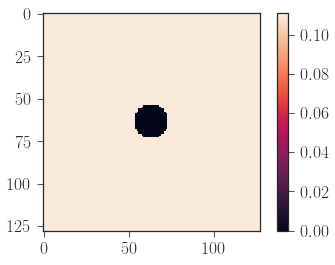

In [22]:
plt.imshow(dla_colony.f_streamed.get()[:, :, 0])
plt.colorbar()
plt.figure()
plt.imshow(dla_colony.f_streamed.get()[:, :, 3])
plt.colorbar()

In [23]:
dla_colony.run(1)

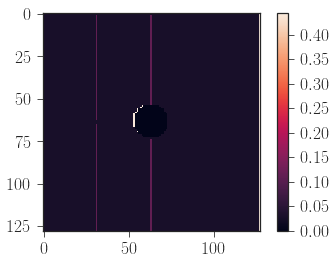

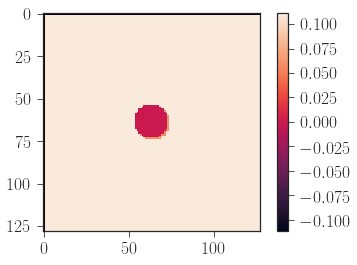

In [36]:
plt.imshow(dla_colony.f_streamed.get()[:, :, 0])
plt.colorbar()
plt.figure()
plt.imshow(dla_colony.f_streamed.get()[:, :, 1])
plt.colorbar()

In [39]:
f0_streamed = dla_colony.f_streamed.get()[:, :, 0]
f0 = dla_colony.f.get()[:, :, 0]

In [50]:
print 'f0_streamed'
print f0_streamed
print 'f0'
print f0

f0_streamed
[[ 0.02777778  0.02777778  0.02777778 ...,  0.02777778  0.02777778
   0.44444444]
 [ 0.02777778  0.02777778  0.02777778 ...,  0.02777778  0.02777778
   0.44444444]
 [ 0.02777778  0.02777778  0.02777778 ...,  0.02777778  0.02777778
   0.44444444]
 ..., 
 [ 0.02777778  0.02777778  0.02777778 ...,  0.02777778  0.02777778
   0.44444444]
 [ 0.02777778  0.02777778  0.02777778 ...,  0.02777778  0.02777778
   0.44444444]
 [ 0.02777778  0.02777778  0.02777778 ...,  0.02777778  0.02777778
   0.44444444]]
f0
[[ 0.44444435  0.44444364  0.44444439 ...,  0.44444346  0.44444448
   0.44444507]
 [ 0.44444454  0.44444378  0.44444405 ...,  0.44444472  0.44444412
   0.44444495]
 [ 0.44444446  0.44444551  0.44444434 ...,  0.44444461  0.44444398
   0.44444453]
 ..., 
 [ 0.44444361  0.44444428  0.44444474 ...,  0.44444447  0.44444487
   0.44444408]
 [ 0.44444387  0.44444455  0.44444429 ...,  0.44444508  0.44444385
   0.44444459]
 [ 0.44444438  0.44444442  0.44444477 ...,  0.44444417  0.44444481
 

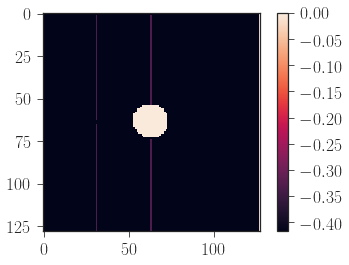

In [55]:
plt.imshow(f0_streamed - f0)
plt.colorbar()

In [51]:
f6 = dla_colony.f.get()[:, :, 6]
f6

array([[ 0.02777775,  0.02777776,  0.02777778, ...,  0.02777779,
         0.02777777,  0.0277778 ],
       [ 0.02777779,  0.02777778,  0.02777783, ...,  0.02777778,
         0.02777779,  0.02777773],
       [ 0.0277778 ,  0.02777778,  0.0277778 , ...,  0.02777778,
         0.0277778 ,  0.02777781],
       ..., 
       [ 0.02777782,  0.02777778,  0.02777779, ...,  0.0277778 ,
         0.02777777,  0.02777782],
       [ 0.0277778 ,  0.02777777,  0.02777778, ...,  0.02777777,
         0.02777782,  0.02777777],
       [ 0.02777776,  0.02777776,  0.02777775, ...,  0.02777778,
         0.02777781,  0.02777781]])

In [56]:
dla_colony.velocity_set.c_vec

array([[ 0,  1,  0, -1,  0,  1, -1, -1,  1],
       [ 0,  0,  1,  0, -1,  1,  1, -1, -1]], dtype=int32)

In [52]:
dla_colony.velocity_set.reflect_list

array([0, 3, 4, 1, 2, 7, 8, 5, 6], dtype=int32)

In [63]:
# dla_colony.run(10)

In [42]:
dla_colony.feq.get().sum()

16078.999864179954

In [43]:
dla_colony.rho.get().sum()

16078.999864179958

In [44]:
dla_colony.f.get().sum()

16078.999864179959

In [45]:
dla_colony.f_streamed.get().sum()

16078.999864179959

In [28]:
# dla_colony.collide_and_propagate.run().wait()
# dla_colony.copy_streamed_onto_f.run().wait()

In [29]:
dla_colony.update_after_streaming.run().wait()

Weird stripes appear to be appearing in my solutions, IDK what's up with that. We will have to troubleshoot...

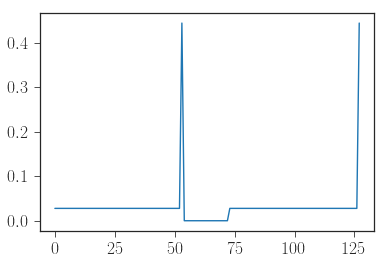

In [35]:
plt.plot(dla_colony.f_streamed.get()[nx/2, :, 0])

lol yeah wtf is going on